In [2]:
import dwdatareader as dw
import matplotlib.pyplot as plt 
import noisereduce as nr
from IPython.display import Audio
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, rfft, rfftfreq
from scipy.signal import butter,filtfilt
import numpy as np
import acoustics.signal as S
import pandas as pd
import re
import os
import librosa as l
import scipy
import PyOctaveBand
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.svm import SVC
import more_itertools as mit
import seaborn as sns
import math
import os
import csv
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from scipy.fftpack import dct
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import percentile
from model import machine
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from frequency_features import Freq_feature

c:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)
3000
(12, 6)

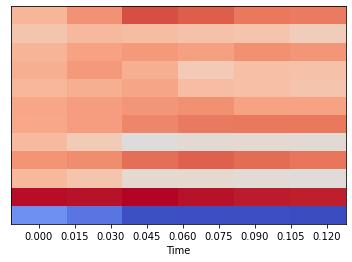

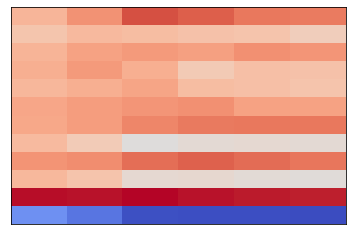

In [27]:
df_05_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
se8_data=df_05_2['SE8']


frame_length=0.06
overlap=50
df=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
        
# if storing_path=='./frequency/':
#     filename=re.sub('.dxd', '', filepath)
# else:
#     filename=re.sub('.dxd', '', filepath[8:])

sampling_rate=50000

window_size=int(frame_length*sampling_rate)
stride=int(((overlap/100)*frame_length)*sampling_rate)

filtered_data=np.array(df['SE8'])

subsection_name=[1,2,3,4,5,6,7,8,9,10]
sub_name=['I_1','II_1','III','I_2','II_2','IV_1','II_3','IV_2','II_4','IV_3']
for i,val in enumerate(subsection_name):
    storing_filename=re.sub('_\d','',sub_name[i])+'.csv'
                    
    indices=np.where(df['Subsection']==val)
    
    se8_subdata=filtered_data[indices[0][0]:indices[0][-1]]
    label_subdata=df['label'].iloc[indices[0][0]:indices[0][-1]]
    
    # print(len(se8_subdata),len(label_subdata),len(rotational_subdata),len(force_subdata))
    # print(val)
    for i in range(0,len(se8_subdata)-(window_size)+1,stride):
    # for i in range(0,len(se8_subdata),1):
        # print(i)
        f=[]
        start=i
        end=i+window_size
                    
        # if window_size>len(se8_subdata[start:end]):
        #     print("Inside")
        #     end=df.shape[0]
        #     data=np.array([0 if i is None else i for i in mit.take(window_size, mit.padnone(se8_subdata[start:end]))])
        # else:
        data=se8_subdata[start:end]
        print(len(data))
        # print(len(data))
        # check if all labels are same or not. 
        # if labels are not same then, take maximum value as label
        
        unique, counts = np.unique(label_subdata[start:end], return_counts=True)
        d=dict(zip(unique, counts))
        # print(filepath,start,end,d)
        if len(d)>1 and (unique[0]==unique[1] or unique[0]>unique[1] or unique[1]>unique[0]):
            max_value=1
        else:
            max_value=unique[0]

        Mfcc=l.feature.mfcc(y=data, sr=sampling_rate,n_mfcc=12,lifter=26)
        print(Mfcc.shape)

import librosa.display as ld 
ld.specshow(Mfcc,x_axis='time')
plt.show()
ld.specshow(Mfcc)
plt.show()

<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)
<class 'numpy.ndarray'> (35, 12)
(420,)


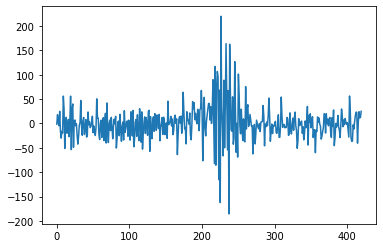

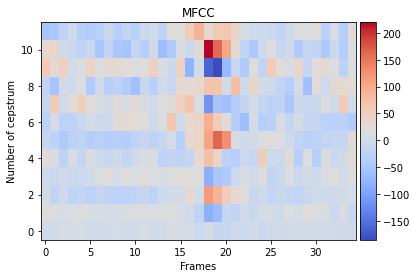

In [58]:
def MFCC_1(signal,sample_rate):
        frame_size=0.025
        frame_stride=0.001
        sample_rate=50000
        frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
        signal_length = len(signal)
        frame_length = int(round(frame_length))
        frame_step = int(round(frame_step))
        num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame
        # print(signal_length,num_frames)
        pad_signal_length = num_frames * frame_step + frame_length
        z = np.zeros((pad_signal_length - signal_length))
        pad_signal = np.append(signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
        # print(len(pad_signal))

        indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        # print(frames.shape)
        frames *= np.hamming(frame_length)
        NFFT=512
        mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
        pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
        nfilt=26 #40
        low_freq_mel = 0
        high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
        mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
        hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
        bin = np.floor((NFFT + 1) * hz_points / sample_rate)
        # print(bin)
        fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
        for m in range(1, nfilt + 1):
            f_m_minus = int(bin[m - 1])   # left
            f_m = int(bin[m])             # center
            f_m_plus = int(bin[m + 1])    # right

            for k in range(f_m_minus, f_m):
                fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
            for k in range(f_m, f_m_plus):
                fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
        filter_banks = np.dot(pow_frames, fbank.T)
        filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
        filter_banks = 20 * np.log10(filter_banks)  # dB
        num_ceps=12
        mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
        cep_lifter=22
        (nframes, ncoeff) = mfcc.shape
        n = np.arange(ncoeff)
        lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
        mfcc *= lift
        filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
        mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
        print(type(mfcc),mfcc.shape)
        return mfcc

frame_length=0.06
overlap=50
df=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
        
# if storing_path=='./frequency/':
#     filename=re.sub('.dxd', '', filepath)
# else:
#     filename=re.sub('.dxd', '', filepath[8:])

sampling_rate=50000

window_size=int(frame_length*sampling_rate)
stride=int(((overlap/100)*frame_length)*sampling_rate)

filtered_data=np.array(df['SE8'])

subsection_name=[1,2,3,4,5,6,7,8,9,10]
sub_name=['I_1','II_1','III','I_2','II_2','IV_1','II_3','IV_2','II_4','IV_3']
for i,val in enumerate(subsection_name):
    storing_filename=re.sub('_\d','',sub_name[i])+'.csv'
                    
    indices=np.where(df['Subsection']==val)
    
    se8_subdata=filtered_data[indices[0][0]:indices[0][-1]]
    label_subdata=df['label'].iloc[indices[0][0]:indices[0][-1]]
    
    # print(len(se8_subdata),len(label_subdata),len(rotational_subdata),len(force_subdata))
    # print(val)
    for i in range(0,len(se8_subdata)-(window_size)+1,stride):
    # for i in range(0,len(se8_subdata),1):
        # print(i)
        f=[]
        start=i
        end=i+window_size
                    
        # if window_size>len(se8_subdata[start:end]):
        #     print("Inside")
        #     end=df.shape[0]
        #     data=np.array([0 if i is None else i for i in mit.take(window_size, mit.padnone(se8_subdata[start:end]))])
        # else:
        data=se8_subdata[start:end]
        # print(len(data))
        # check if all labels are same or not. 
        # if labels are not same then, take maximum value as label
        
        unique, counts = np.unique(label_subdata[start:end], return_counts=True)
        d=dict(zip(unique, counts))
        # print(filepath,start,end,d)
        if len(d)>1 and (unique[0]==unique[1] or unique[0]>unique[1] or unique[1]>unique[0]):
            max_value=1
        else:
            max_value=unique[0]
        mfcc_data=MFCC_1(data,sampling_rate).flatten()
        print(mfcc_data.shape)
        f=list(mfcc_data)
        f.append(max_value)
print(f)
import librosa.display as ld 
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.plot(mfcc_data)
plt.show()
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

mfcc_d= np.swapaxes(mfcc_data.reshape(-1,12), 0 ,1)
im = ax.imshow(mfcc_d, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_xlabel('Frames')
ax.set_ylabel('Number of cepstrum')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()

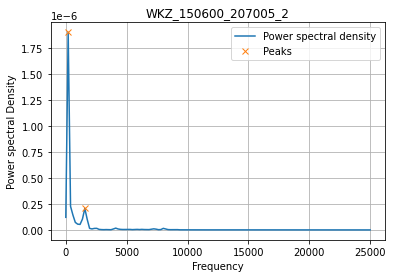

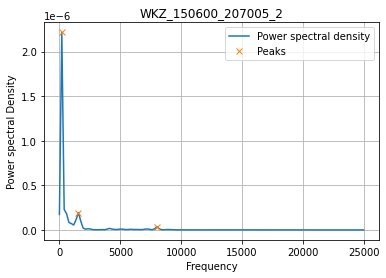

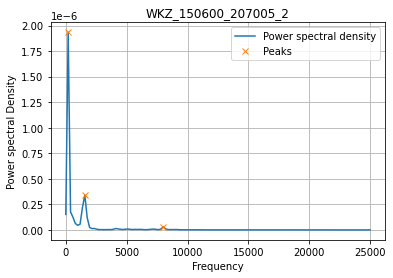

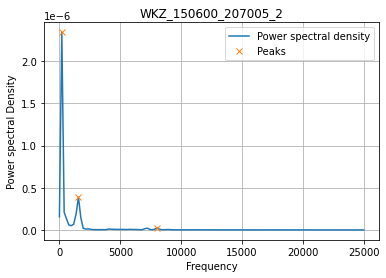

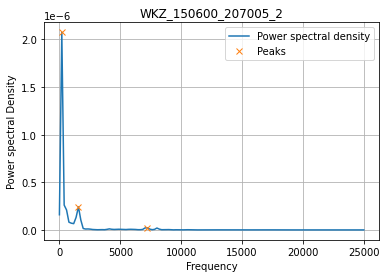

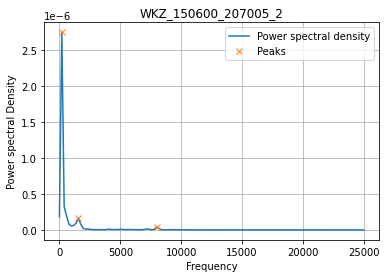

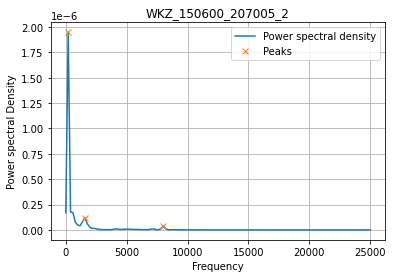

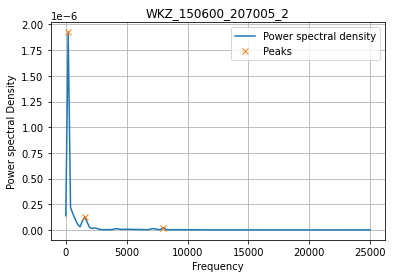

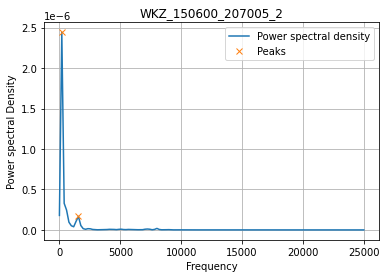

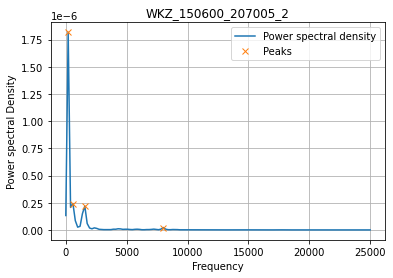

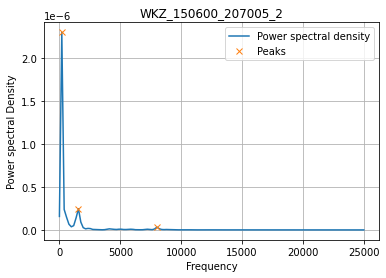

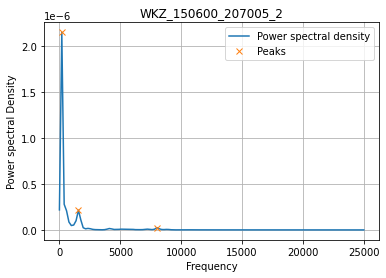

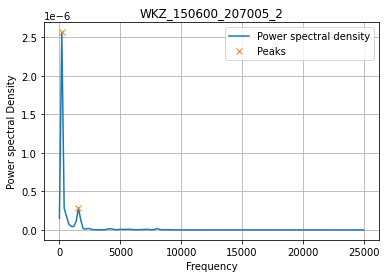

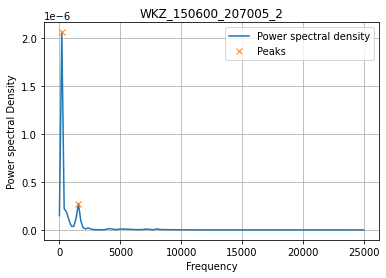

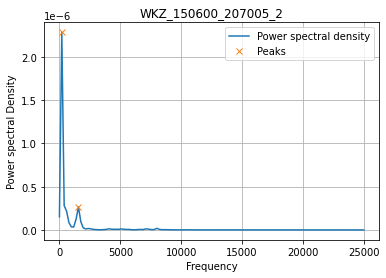

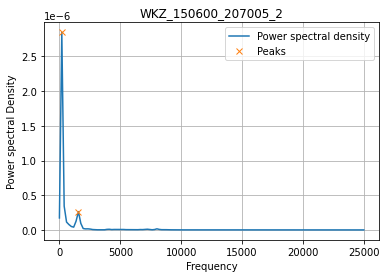

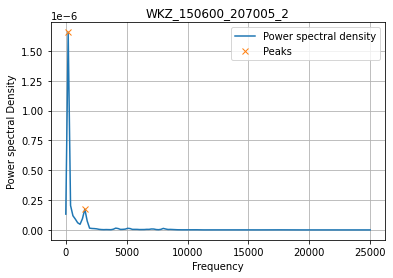

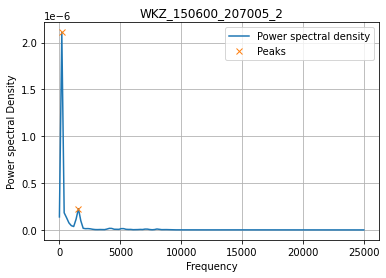

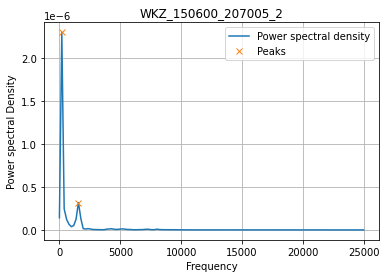

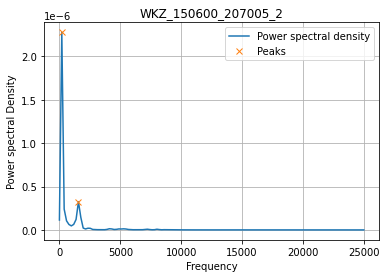

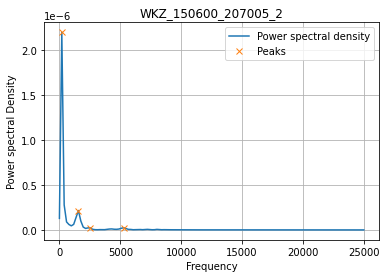

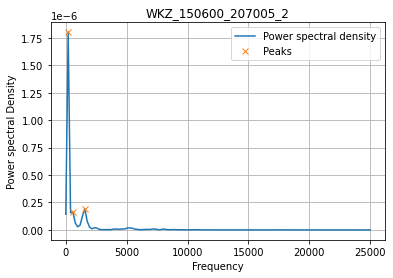

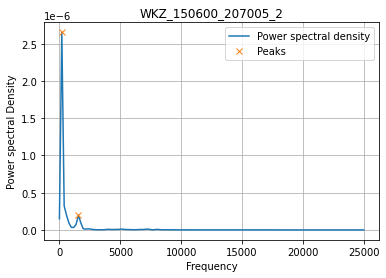

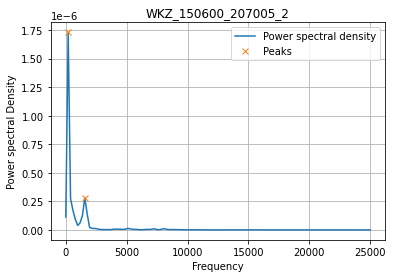

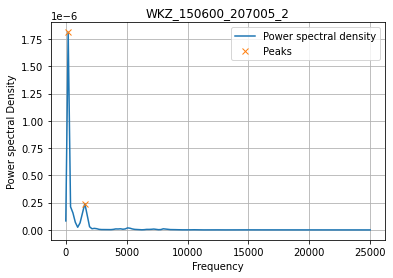

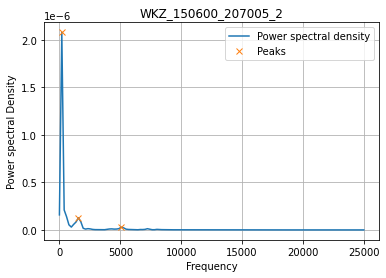

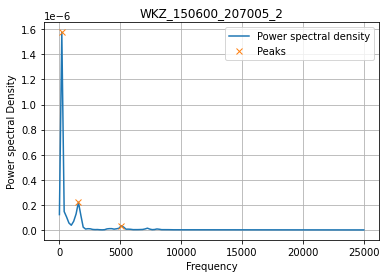

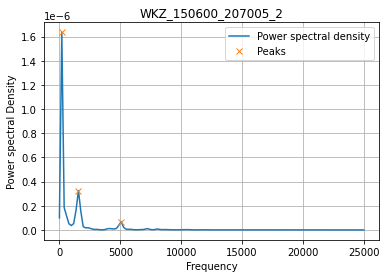

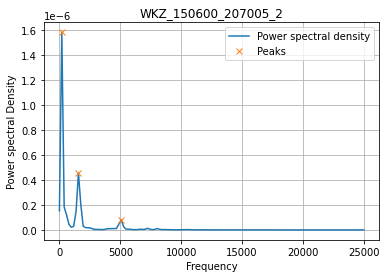

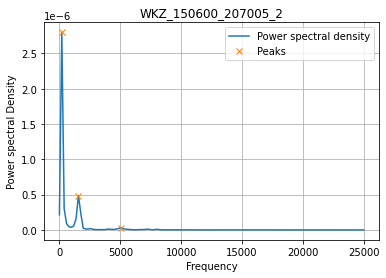

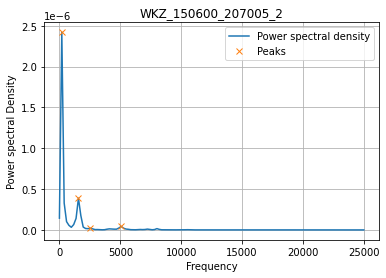

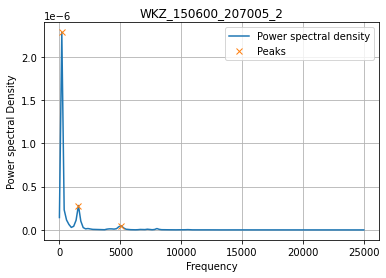

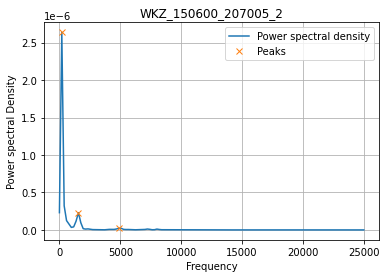

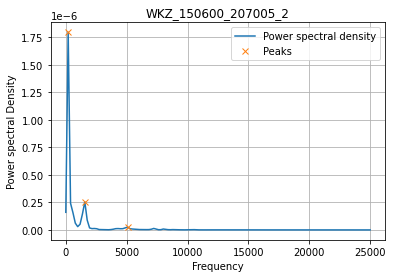

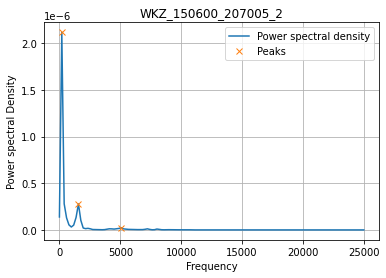

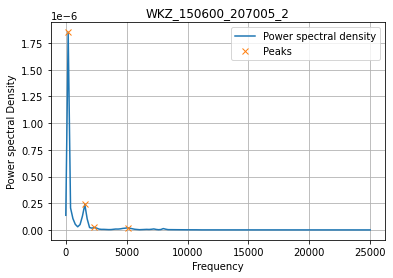

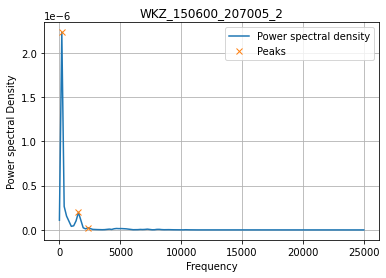

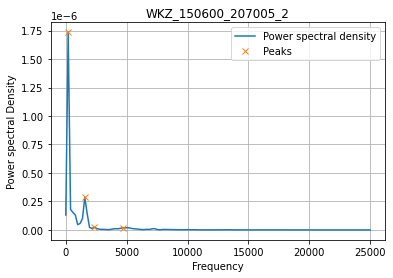

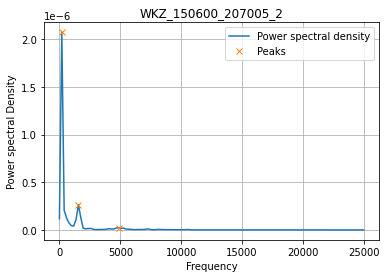

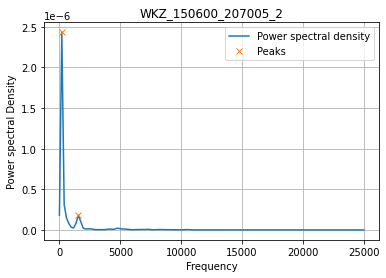

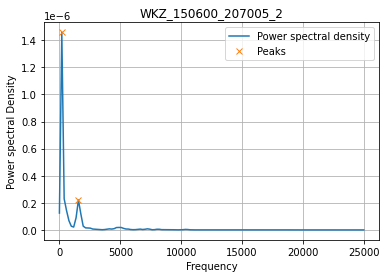

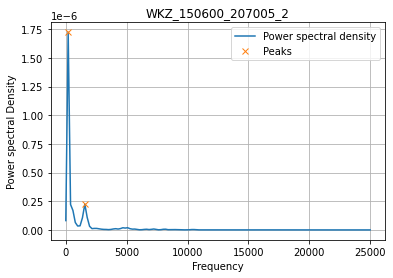

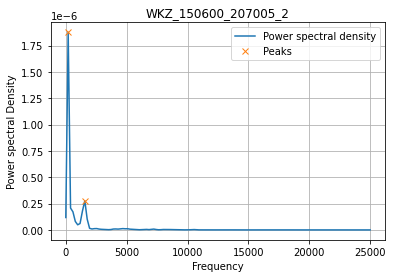

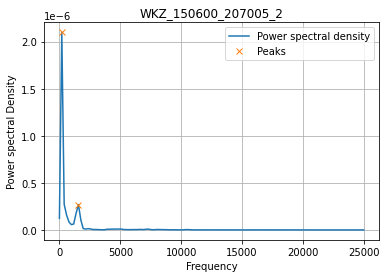

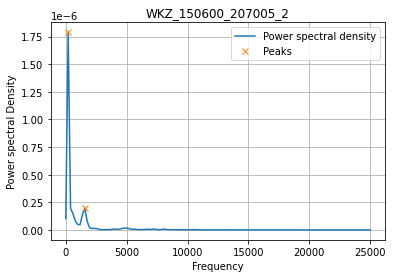

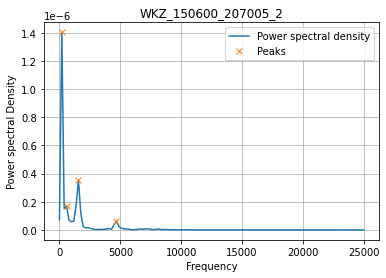

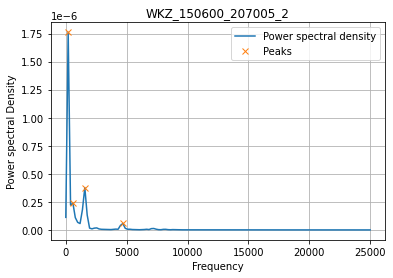

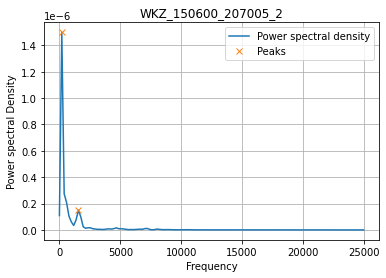

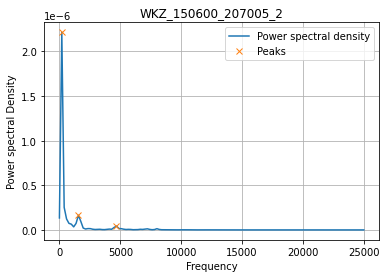

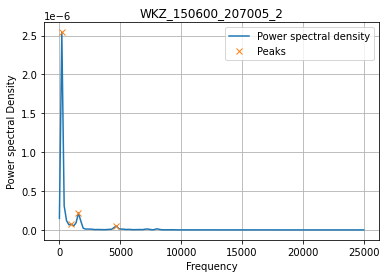

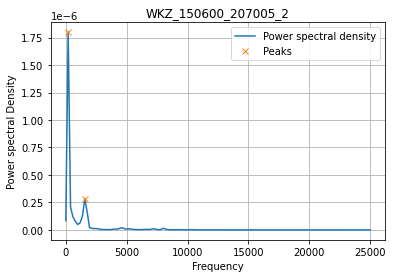

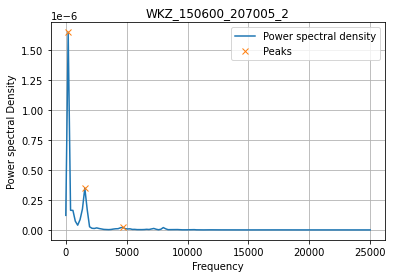

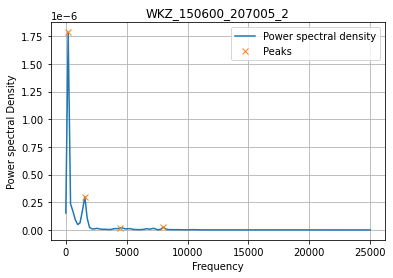

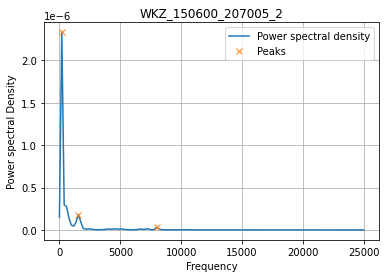

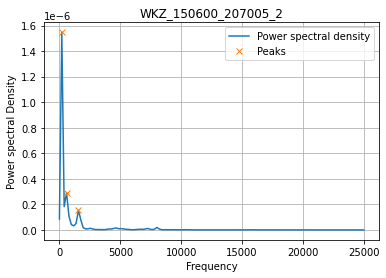

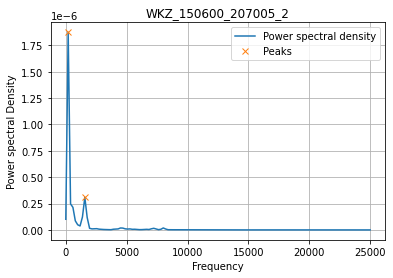

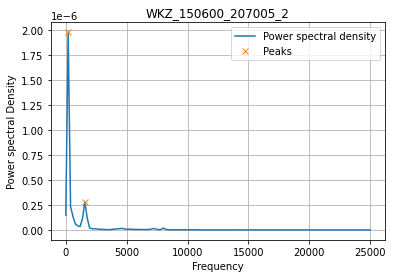

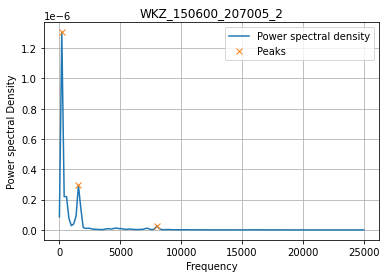

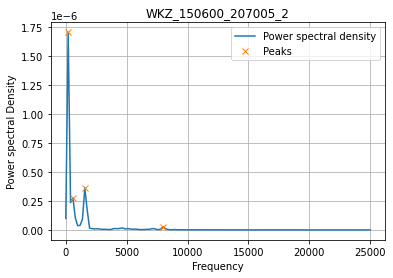

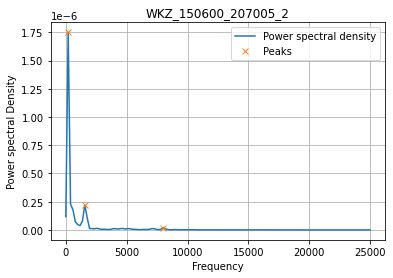

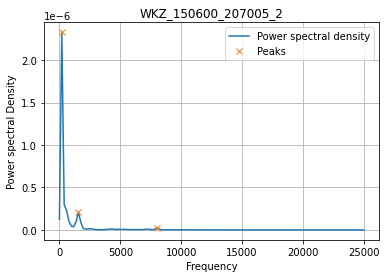

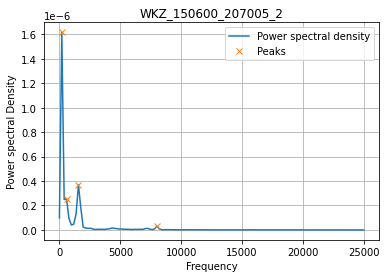

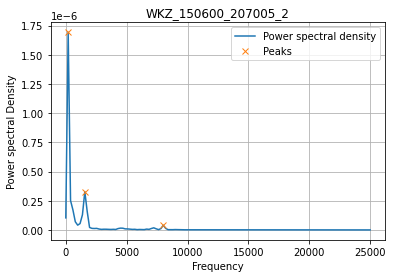

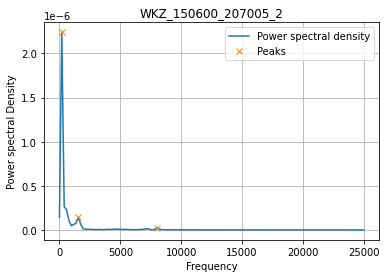

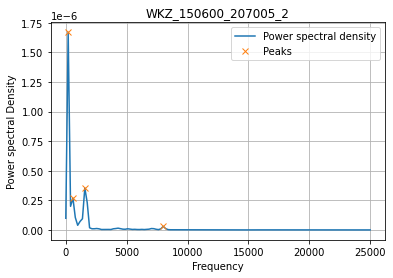

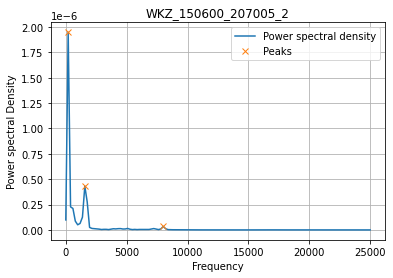

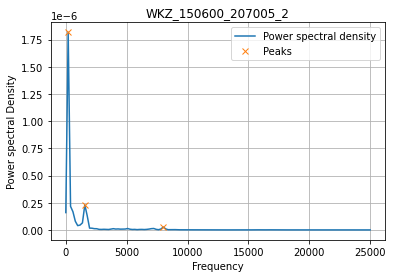

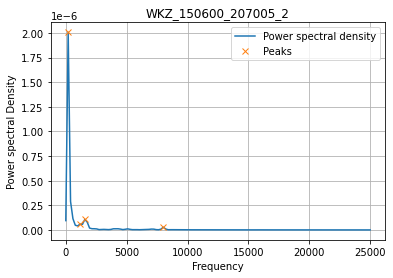

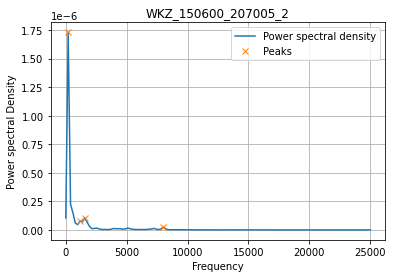

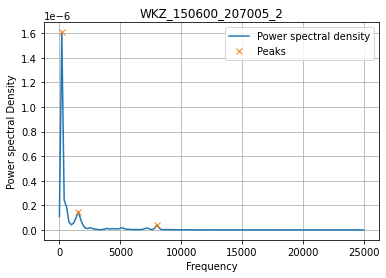

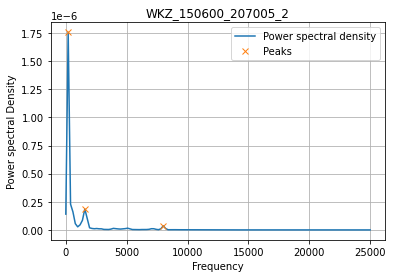

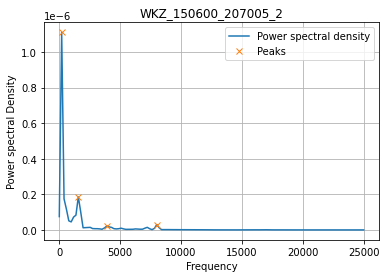

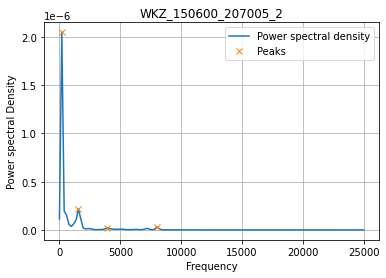

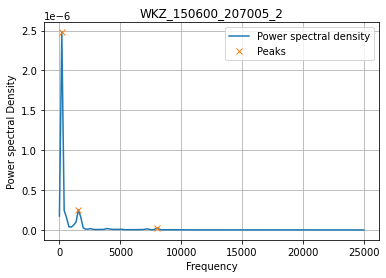

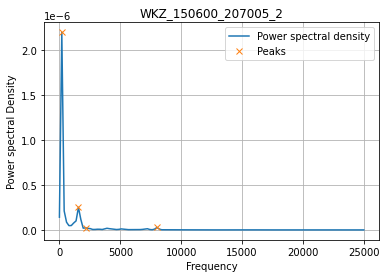

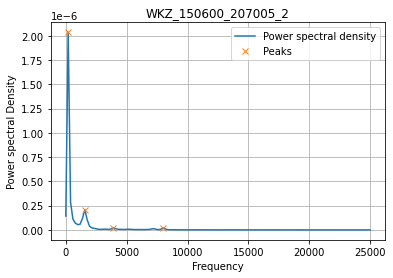

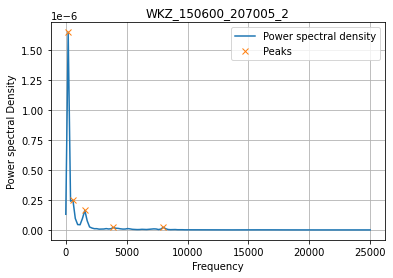

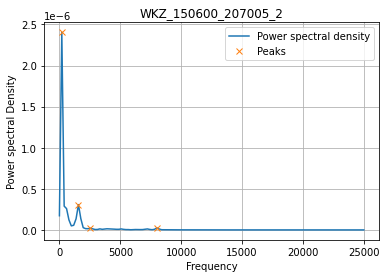

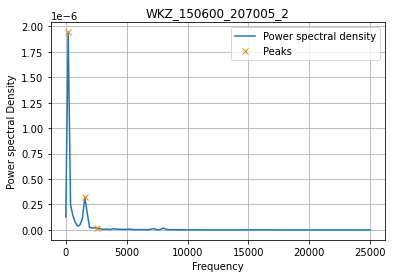

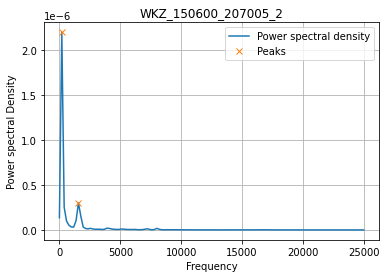

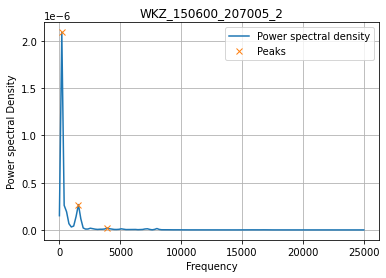

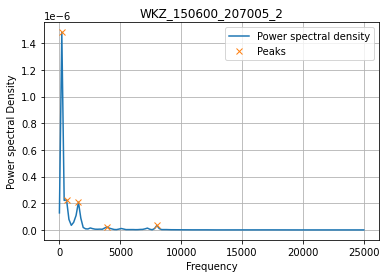

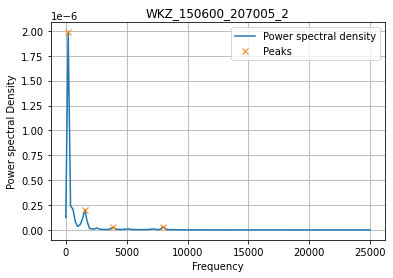

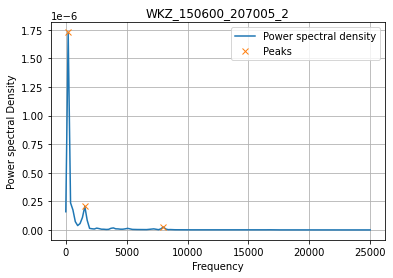

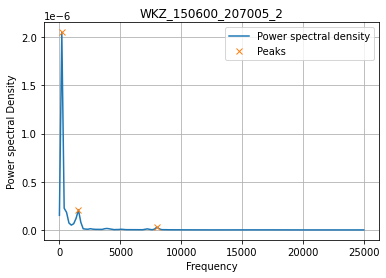

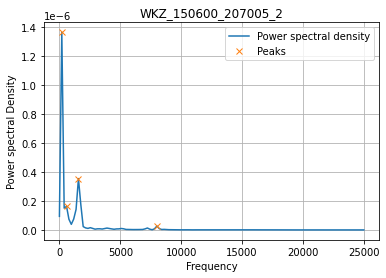

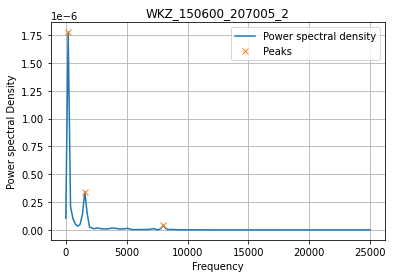

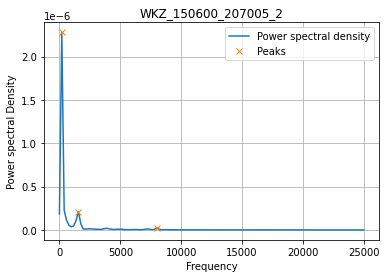

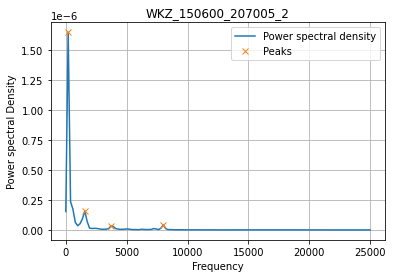

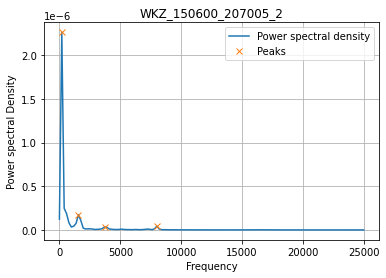

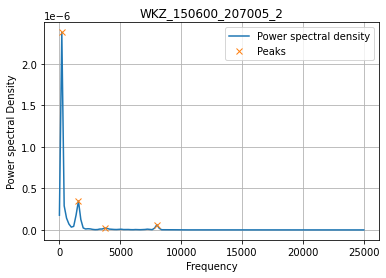

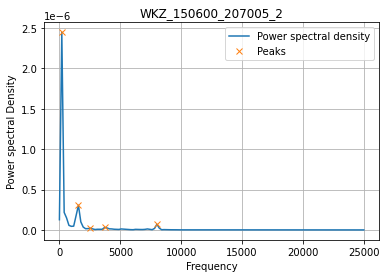

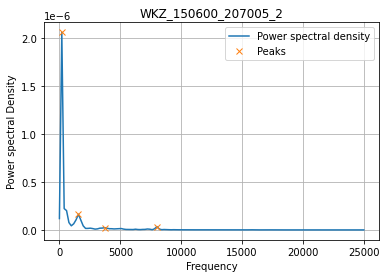

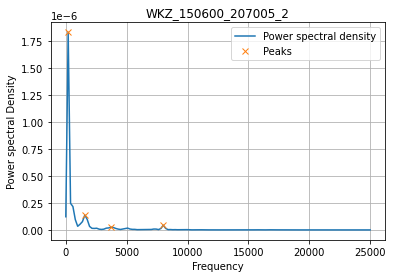

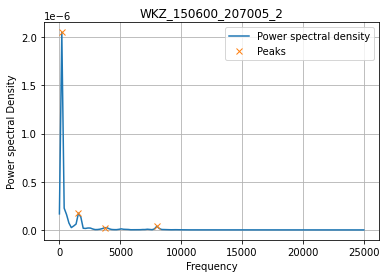

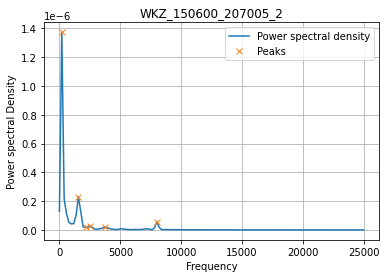

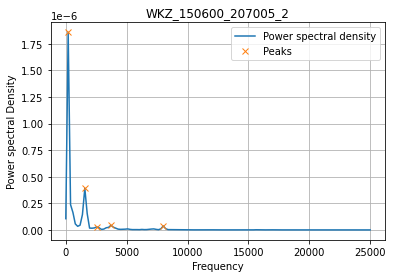

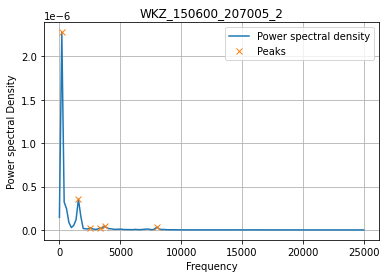

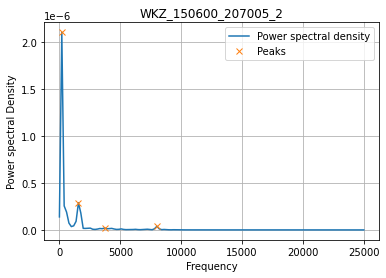

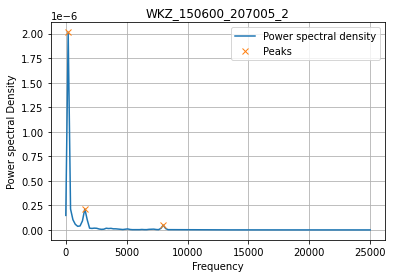

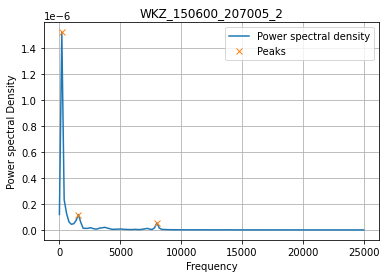

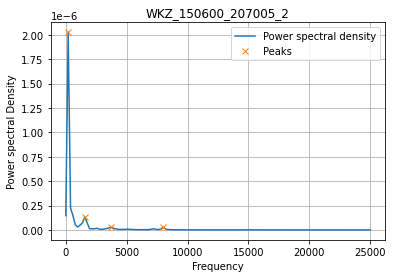

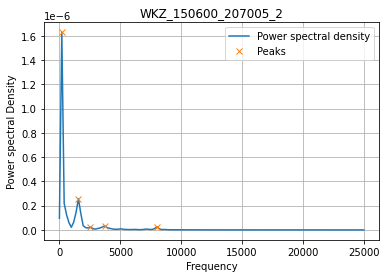

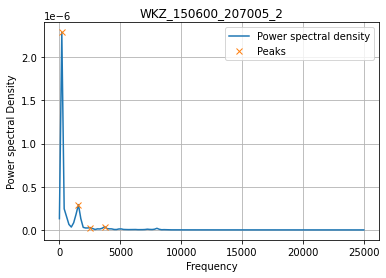

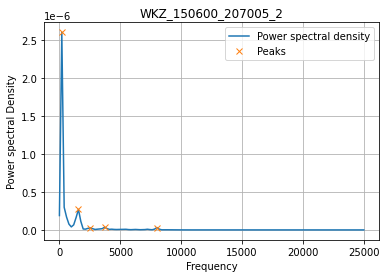

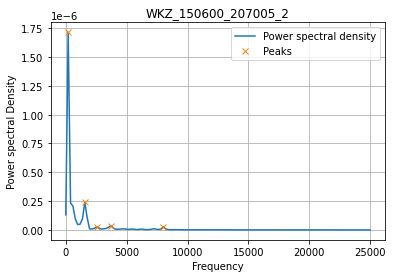

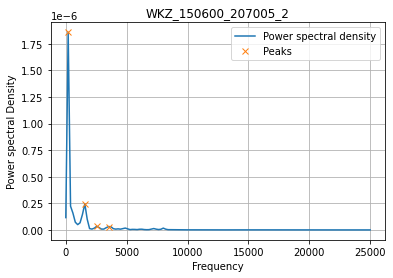

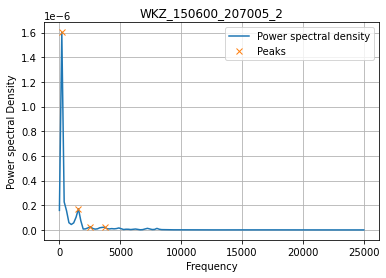

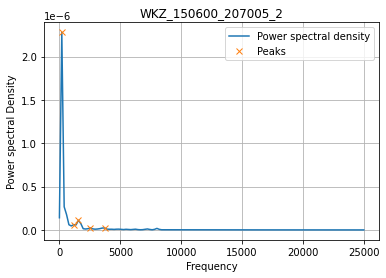

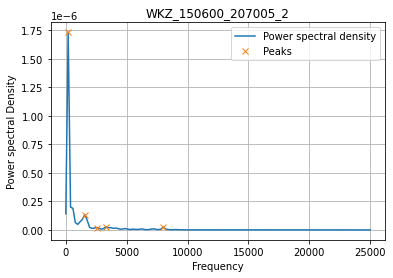

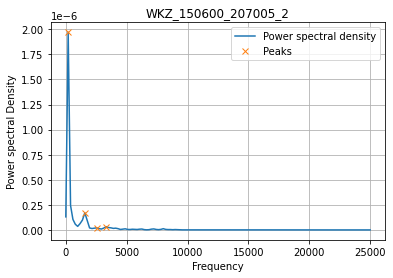

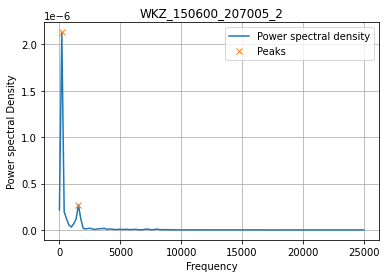

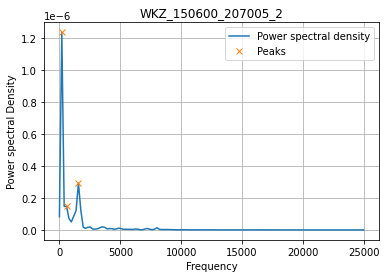

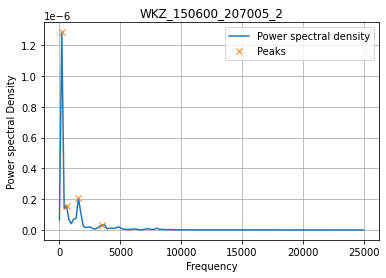

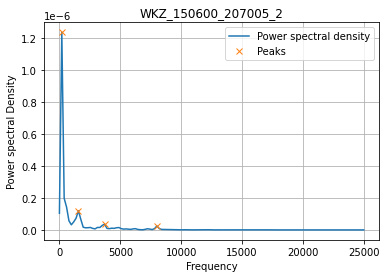

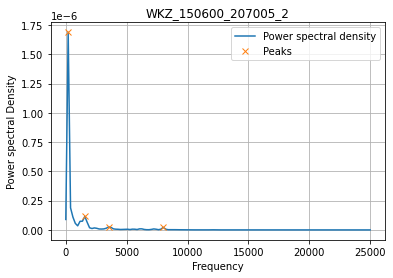

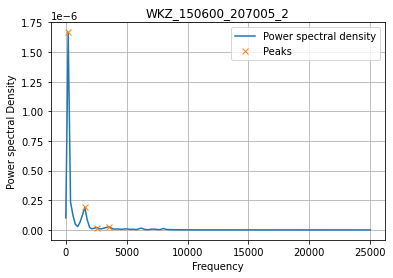

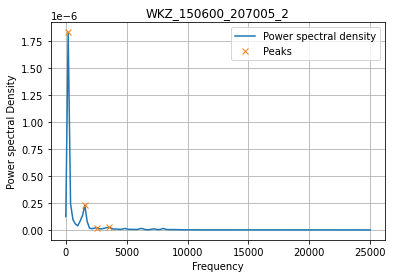

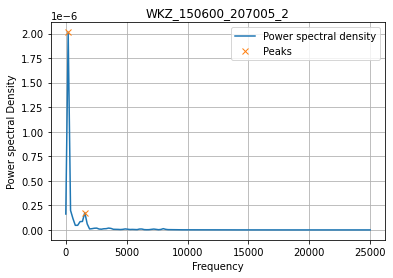

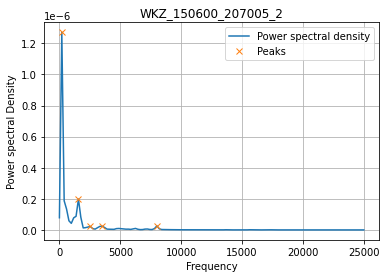

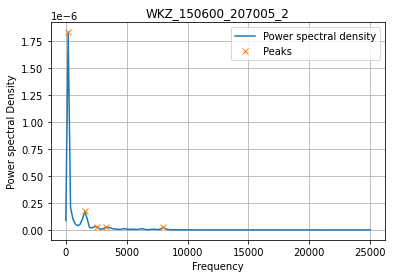

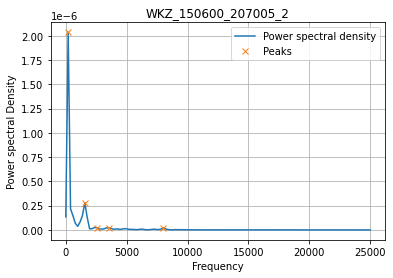

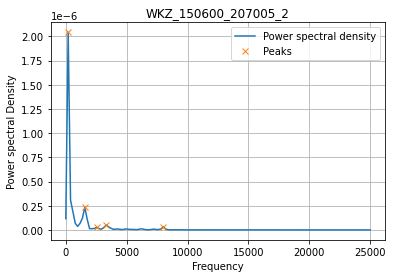

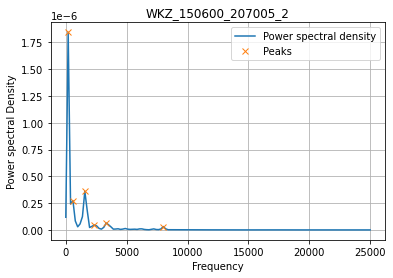

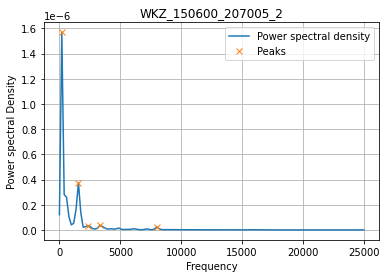

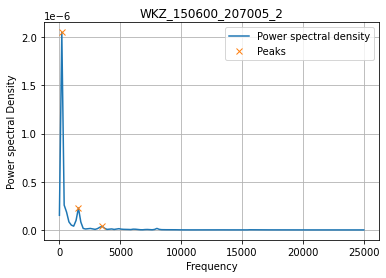

KeyboardInterrupt: 

In [6]:
def find_peak(freq, data):
    col=[]
    
    peaks_index, properties = signal.find_peaks(np.abs(data[0:10]), height=0.00000001, width=0)
    P=np.sum(data[peaks_index])
    col.append(P)
    
    peaks_index, properties = signal.find_peaks(np.abs(data[10:20]), height=0.00000001, width=0)
    P1=np.sum(data[peaks_index])
    col.append(P1)
    
    peaks_index, properties = signal.find_peaks(np.abs(data[20:30]), height=0.00000001, width=0)
    P2=np.sum(data[peaks_index])
    col.append(P2)
    
    peaks_index, properties = signal.find_peaks(np.abs(data[30:40]), height=0.00000001, width=0)
    P3=np.sum(data[peaks_index])
    col.append(P3)
    
    peaks_index, properties = signal.find_peaks(np.abs(data[40:50]), height=0.00000001, width=0)
    P4=np.sum(data[peaks_index])
    col.append(P4)
    
    return col
    
frame_length=0.06
overlap=50
df=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
        
# if storing_path=='./frequency/':
#     filename=re.sub('.dxd', '', filepath)
# else:
#     filename=re.sub('.dxd', '', filepath[8:])

sampling_rate=50000

window_size=int(frame_length*sampling_rate)
stride=int(((overlap/100)*frame_length)*sampling_rate)

filtered_data=np.array(df['SE8'])

subsection_name=[1,2,3,4,5,6,7,8,9,10]
sub_name=['I_1','II_1','III','I_2','II_2','IV_1','II_3','IV_2','II_4','IV_3']
for i,val in enumerate(subsection_name):
    if val==2:
            
        # storing_filename=re.sub('_\d','',sub_name[i])+'.csv'
                        
        indices=np.where(df['Subsection']==val)
        
        se8_subdata=filtered_data[indices[0][0]:indices[0][-1]]
        label_subdata=df['label'].iloc[indices[0][0]:indices[0][-1]]
        
        # print(len(se8_subdata),len(label_subdata),len(rotational_subdata),len(force_subdata))
        # print(val)
        col=[]
        for i in range(0,len(se8_subdata)-(window_size)+1,stride):
        # for i in range(0,len(se8_subdata),1):
            # print(i)
            f=[]
            start=i
            end=i+window_size
                        
            # if window_size>len(se8_subdata[start:end]):
            #     print("Inside")
            #     end=df.shape[0]
            #     data=np.array([0 if i is None else i for i in mit.take(window_size, mit.padnone(se8_subdata[start:end]))])
            # else:
            data=se8_subdata[start:end]
            # print(len(data))
            # check if all labels are same or not. 
            # if labels are not same then, take maximum value as label
            
            unique, counts = np.unique(label_subdata[start:end], return_counts=True)
            d=dict(zip(unique, counts))
            # print(filepath,start,end,d)
            if len(d)>1 and (unique[0]==unique[1] or unique[0]>unique[1] or unique[1]>unique[0]):
                max_value=1
            else:
                max_value=unique[0]
            
            freq_data,data=signal.welch(data,sampling_rate)
            # peaks_index, properties = signal.find_peaks(np.abs(data), height=0.00000001, width=0)
            # print(peaks_index,properties)
            peaks_index, properties = signal.find_peaks(np.abs(data), height=0.00000002, width=0)
            # f=list(find_peak(freq_data,data))
            # print(f)
    
            plt.plot(freq_data, data,'-',label='Power spectral density')
            plt.plot(freq_data[peaks_index],properties['peak_heights'],'x',label='Peaks')
            plt.xlabel("Frequency")
            plt.ylabel("Power spectral Density")
            plt.title('WKZ_150600_207005_2')
            plt.legend()
            plt.grid()
            plt.show()

In [18]:
df_05_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
se8_data=df_05_2['SE8']
F=Freq_feature
frame_length=0.06
overlap=50
Mfcc_II_cavity=l.feature.mfcc(y=np.array(se8_data[692594+6000:692594+9000]), sr=50000,n_mfcc=20)
flattened_mfcc=Mfcc_II_cavity.flatten()
print(len(flattened_mfcc))
df_05_1=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_1.csv')
se8_data=df_05_1['SE8']
Mfcc_II_notcavity=l.feature.mfcc(y=np.array(se8_data[689397+6000:689397+9000]), sr=50000,n_mfcc=20)
flattened_notmfcc=Mfcc_II_notcavity.flatten()
print(len(flattened_notmfcc))

120
120


12000
3000


[Text(0.5, 1.0, 'Section II not anomalous')]

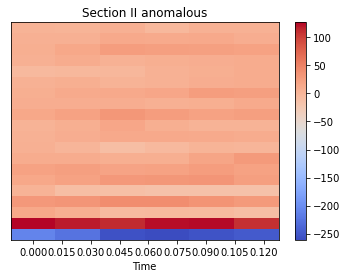

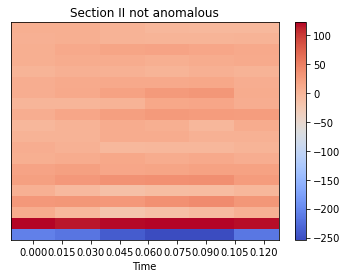

In [20]:
import librosa.display as l1
print((692594+18000)-(692594+6000))
print((689397+9000)-(689397+6000))
fig, ax = plt.subplots(nrows=1, sharex=True)
img = l1.specshow(Mfcc_II_cavity, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Section II anomalous')
fig, ax = plt.subplots(nrows=1, sharex=True)
img = l1.specshow(Mfcc_II_notcavity, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Section II not anomalous')


In [70]:
from scipy import signal
data1=df_05_1['SE8']
# df_05_2
signal_amplitude=[]
peak_frequency=[]
freq_data,data=signal.welch(data1,fs=50000)
peaks_index, properties = signal.find_peaks(np.abs(data), height=0.00000002, width=0)
print(peaks_index)

[ 1  8 41]


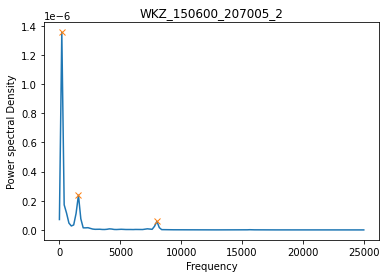

In [71]:
plt.plot(freq_data, data,'-', freq_data[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Power spectral Density")
plt.title('WKZ_150600_207005_2')
plt.show()

1353


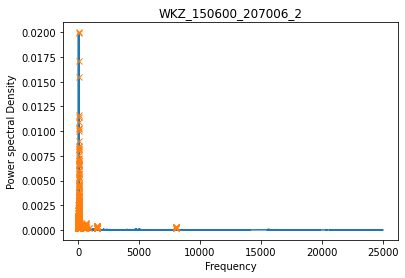

In [91]:
data_05=df_05_2['SE8']
signal_amplitude=[]
peak_frequency=[]
y_fourier=rfft(np.array(data_05))/len(data_05)
x_fourier=rfftfreq(len(data_05),1/50000)
peaks_index, properties = signal.find_peaks(np.abs(y_fourier), height=0.0002, width=0)
print(len(peaks_index))

plt.plot(x_fourier, np.abs(y_fourier),'-', x_fourier[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Amplitude ")
plt.title('WKZ_150600_207006_2')
plt.show()

In [61]:
from scipy import signal
df_06_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207006/WKZ_150600_207006_2.csv')
# df_05_2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


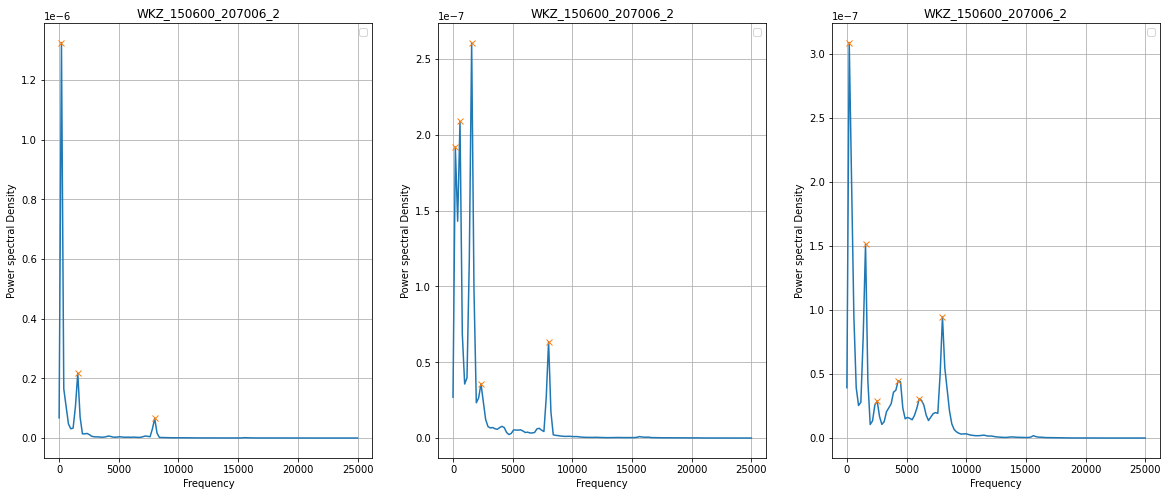

In [7]:
df_05_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
df_06_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207006/WKZ_150600_207006_2.csv')
df_11_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207011/WKZ_150600_207011_2.csv')

data_05=df_05_2['SE8']
signal_amplitude=[]
peak_frequency=[]
freq_data_5,data_5=signal.welch(data_05,fs=50000)
peaks_index_5, properties_5 = signal.find_peaks(np.abs(data_5), height=0.00000002, width=0)

data_06=df_06_2['SE8']
signal_amplitude=[]
peak_frequency=[]
freq_data_6,data_6=signal.welch(data_06,fs=50000)
peaks_index_6, properties_6 = signal.find_peaks(np.abs(data_6), height=0.00000002, width=0)

data_11=df_11_2['SE8']
signal_amplitude=[]
peak_frequency=[]
freq_data_11,data_11=signal.welch(data_11,fs=50000)
peaks_index_11, properties_11 = signal.find_peaks(np.abs(data_11), height=0.00000002, width=0)


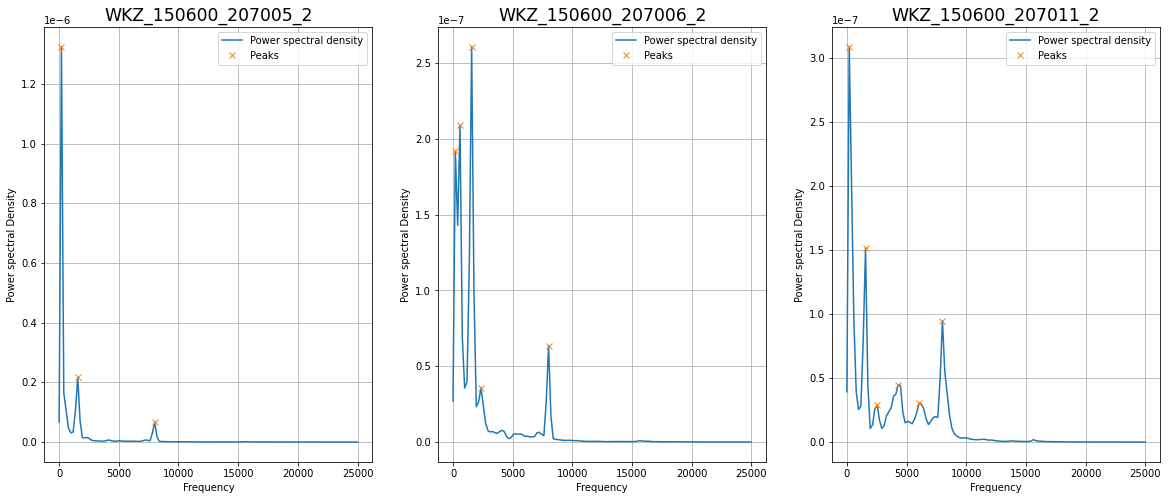

In [10]:
fig, ax=plt.subplots(1,3, figsize=(20,8))
ax[0].plot(freq_data_5, data_5, label='Power spectral density')#'-',
ax[0].plot(freq_data_5[peaks_index_5],properties_5['peak_heights'],'x',label='Peaks')
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Power spectral Density")
ax[0].set_title('WKZ_150600_207005_2',fontsize='xx-large',y=1)
ax[0].grid()
ax[0].legend()

ax[1].plot(freq_data_6, data_6, label='Power spectral density')#'-',
ax[1].plot(freq_data_6[peaks_index_6],properties_6['peak_heights'],'x',label='Peaks')
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Power spectral Density")
ax[1].set_title('WKZ_150600_207006_2',fontsize='xx-large',y=1)
ax[1].grid()
ax[1].legend()

ax[2].plot(freq_data_11, data_11, label='Power spectral density')#'-',
ax[2].plot(freq_data_11[peaks_index_11],properties_11['peak_heights'],'x',label='Peaks')
ax[2].set_xlabel("Frequency")
ax[2].set_ylabel("Power spectral Density")
ax[2].set_title('WKZ_150600_207011_2',fontsize='xx-large',y=1)
ax[2].grid()
ax[2].legend()
plt.show()

In [17]:
df=pd.read_csv('../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/II.csv',header=None)
df.columns=['Freq. bin 1','Freq. bin 2','Freq. bin 3','Freq. bin 4','Freq. bin 5','label']
df.head()

,Freq. bin 1,Freq. bin 2,Freq. bin 3,Freq. bin 4,Freq. bin 5,label
0,0.000002,1.665897e-06,0.000000e+00,0.000000e+00,0.000002,1.0
1,0.000001,2.612558e-07,6.951052e-08,0.000000e+00,0.000001,1.0
2,0.000002,2.519673e-07,7.007139e-08,7.007139e-08,0.000002,1.0
3,0.000002,2.516906e-07,6.032098e-08,1.163704e-07,0.000002,1.0
4,0.000002,2.365447e-07,8.949346e-08,8.949346e-08,0.000002,1.0


[ 1  3  8 12 41]


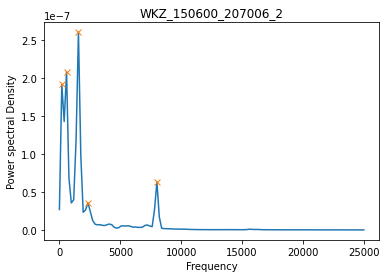

In [68]:
data_06=df_06_2['SE8']
signal_amplitude=[]
peak_frequency=[]
freq_data,data=signal.welch(data_06,fs=50000)
peaks_index, properties = signal.find_peaks(np.abs(data), height=0.00000002, width=0)
print(peaks_index)

plt.plot(freq_data, data,'-', freq_data[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Power spectral Density")
plt.title('WKZ_150600_207006_2')
plt.show()

702


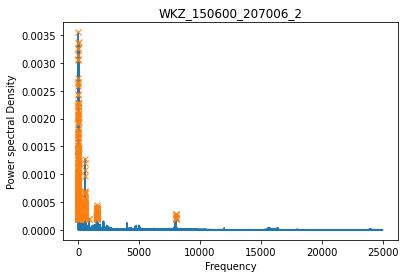

In [84]:
data_06=df_06_2['SE8']
signal_amplitude=[]
peak_frequency=[]
y_fourier=rfft(np.array(data_06))/len(data_06)
x_fourier=rfftfreq(len(data_06),1/50000)
peaks_index, properties = signal.find_peaks(np.abs(y_fourier), height=0.0002, width=0)
print(len(peaks_index))

plt.plot(x_fourier, np.abs(y_fourier),'-', x_fourier[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Power spectral Density")
plt.title('WKZ_150600_207006_2')
plt.show()

In [63]:
df_11_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207011/WKZ_150600_207011_2.csv')
data_11=df_11_2['SE8']

In [64]:
signal_amplitude=[]
peak_frequency=[]
freq_data,data=signal.welch(data_11,fs=50000)
peaks_index, properties = signal.find_peaks(np.abs(data), height=0.00000002, width=0)
print(peaks_index)

[ 1  8 13 22 31 41]


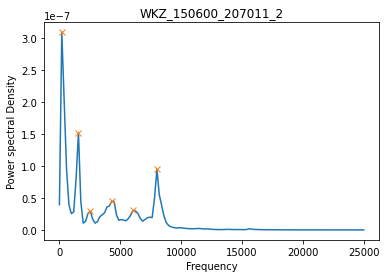

In [67]:
plt.plot(freq_data, data,'-', freq_data[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Power spectral Density")
plt.title('WKZ_150600_207011_2')
plt.show()

50


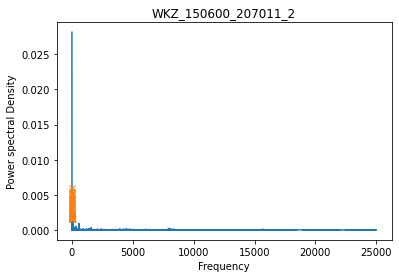

In [90]:
data_11=df_11_2['SE8']
signal_amplitude=[]
peak_frequency=[]
y_fourier=rfft(np.array(data_11))/len(data_11)
x_fourier=rfftfreq(len(data_11),1/50000)
peaks_index, properties = signal.find_peaks(np.abs(y_fourier), height=0.0015, width=0)
print(len(peaks_index))

plt.plot(x_fourier, np.abs(y_fourier),'-', x_fourier[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Power spectral Density")
plt.title('WKZ_150600_207011_2')
plt.show()

In [9]:
filepath1='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/II.csv'
filepath2='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207006/Feature/Time/II.csv'
filepath3='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207011/Feature/Time/II.csv'
df1=pd.read_csv(filepath1,header=None)
# df1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df1.head()

df2=pd.read_csv(filepath2,header=None)
# df2.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df2.head()

df3=pd.read_csv(filepath3,header=None)
# df3.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df3.head()

combined_II_1=pd.concat([df1,df2,df3])
combined_II_1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# combined_II.head()

data=combined_II_1.iloc[:,:-1]
label=np.array(combined_II_1.iloc[:,-1:]).ravel().astype(int)
norm_time=MinMaxScaler()
norm_time.fit(data)
norm_data3=norm_time.transform(data)
N_II=pd.DataFrame(norm_data3)
N_II.reset_index()
N_label_II=pd.DataFrame(label)
N_label_II.reset_index()
combined_II=pd.concat([N_II,N_label_II],axis=1)
combined_II.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# print(norm_data_time3.head())

In [74]:
print(combined_II.shape)

(55594, 20)


Dataset values
 1    52351
0     3243
Name: label, dtype: int64


c:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'no cavity'), Text(1, 0, 'cavity')]

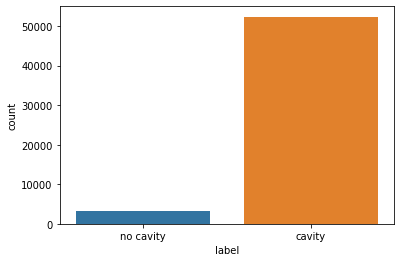

In [75]:
class_names=['no cavity','cavity']
# splitting train into cavity and not cavity dataframe

combined_II.rename(columns={combined_II.columns[-1]:'label'},inplace=True)
# df_train.head()
print("Dataset values\n",combined_II.label.value_counts())

ax = sns.countplot(combined_II.label)
ax.set_xticklabels(class_names)


In [76]:
normal_dataset = combined_II[combined_II.label == 0] 
cavity_dataset = combined_II[combined_II.label == 1]
print(normal_dataset.shape,cavity_dataset.shape)

(3243, 20) (52351, 20)


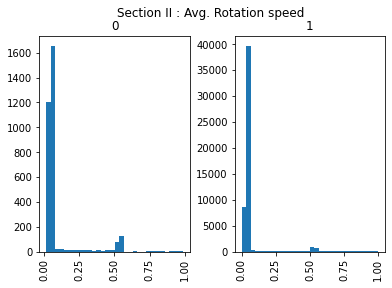

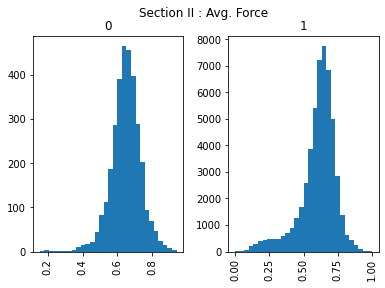

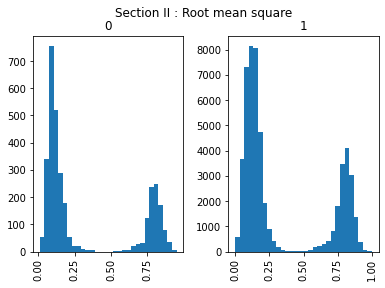

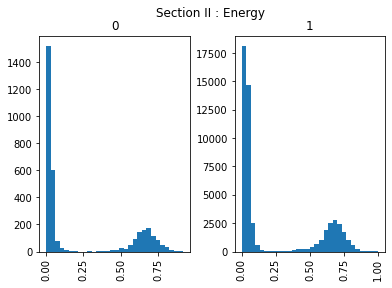

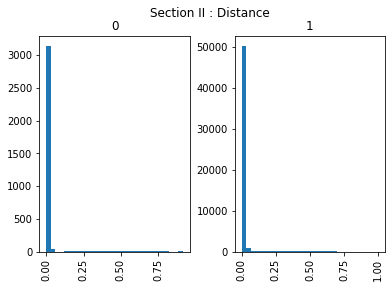

In [77]:
combined_II['avg_rotation'].hist(by=combined_II['label'],bins=30)
plt.suptitle('Section II : Avg. Rotation speed ',y=1)
plt.show()

combined_II['avg_force'].hist(by=combined_II['label'],bins=30)
plt.suptitle('Section II : Avg. Force ', y=1)
plt.show()

# ['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']
combined_II['root_mean_square'].hist(by=combined_II['label'],bins=30)
plt.suptitle('Section II : Root mean square ', y=1)
plt.show()

combined_II['energy'].hist(by=combined_II['label'],bins=30)
plt.suptitle('Section II : Energy ', y=1)
plt.show()

combined_II['distance'].hist(by=combined_II['label'],bins=30)
plt.suptitle('Section II : Distance ', y=1)
plt.show()

In [78]:
filepath4='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/III.csv'
filepath5='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207006/Feature/Time/III.csv'
filepath6='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207011/Feature/Time/III.csv'
df4=pd.read_csv(filepath4,header=None)
# df1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df1.head()

df5=pd.read_csv(filepath5,header=None)
# df2.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df2.head()

df6=pd.read_csv(filepath6,header=None)
# df3.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df3.head()

combined_III_1=pd.concat([df4,df5,df6])
combined_III_1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
combined_III_1.head()

data=combined_III_1.iloc[:,:-1]
label=np.array(combined_III_1.iloc[:,-1:]).ravel().astype(int)
norm_time=MinMaxScaler()
norm_time.fit(data)
norm_data3=norm_time.transform(data)
N_III=pd.DataFrame(norm_data3)
N_III.reset_index()
N_label_III=pd.DataFrame(label)
N_label_III.reset_index()
combined_III=pd.concat([N_III,N_label_III],axis=1)
combined_III.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# print(norm_data_time3.head())

Dataset values
 0    15624
1     4165
Name: label, dtype: int64


c:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'no cavity'), Text(1, 0, 'cavity')]

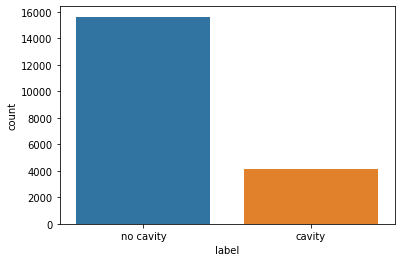

In [79]:
class_names=['no cavity','cavity']
# splitting train into cavity and not cavity dataframe

combined_II.rename(columns={combined_III.columns[-1]:'label'},inplace=True)
# df_train.head()
print("Dataset values\n",combined_III.label.value_counts())

ax = sns.countplot(combined_III.label)
ax.set_xticklabels(class_names)

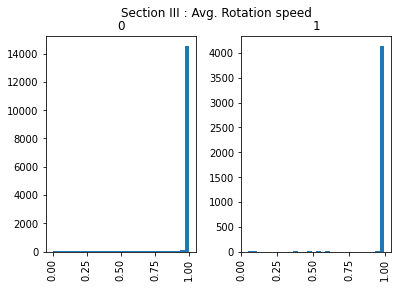

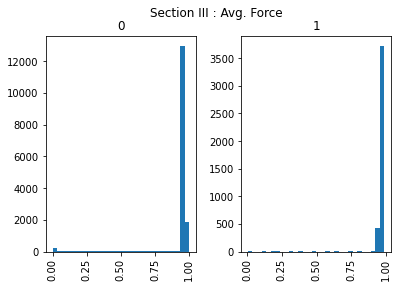

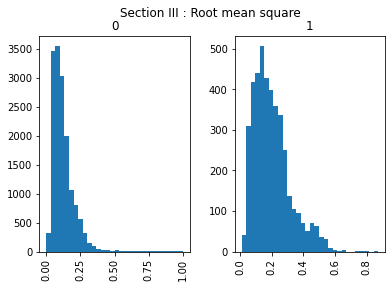

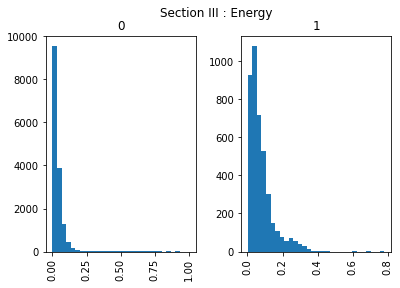

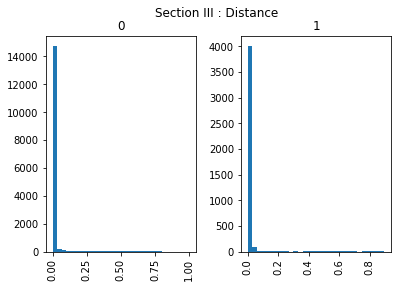

In [80]:
combined_III['avg_rotation'].hist(by=combined_III['label'],bins=30)
plt.suptitle('Section III : Avg. Rotation speed ',y=1)
plt.show()

combined_III['avg_force'].hist(by=combined_III['label'],bins=30)
plt.suptitle('Section III : Avg. Force ', y=1)
plt.show()

# ['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']
combined_III['root_mean_square'].hist(by=combined_III['label'],bins=30)
plt.suptitle('Section III : Root mean square ', y=1)
plt.show()

combined_III['energy'].hist(by=combined_III['label'],bins=30)
plt.suptitle('Section III : Energy ', y=1)
plt.show()

combined_III['distance'].hist(by=combined_III['label'],bins=30)
plt.suptitle('Section III : Distance ', y=1)
plt.show()

In [81]:
filepath7='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/IV.csv'
filepath8='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207006/Feature/Time/IV.csv'
filepath9='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207011/Feature/Time/IV.csv'
df7=pd.read_csv(filepath7,header=None)
# df1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df1.head()

df8=pd.read_csv(filepath8,header=None)
# df2.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df2.head()

df96=pd.read_csv(filepath9,header=None)
# df3.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# df3.head()

combined_IV_1=pd.concat([df4,df5,df6])
combined_IV_1.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
combined_IV_1.head()

data=combined_IV_1.iloc[:,:-1]
label=np.array(combined_IV_1.iloc[:,-1:]).ravel().astype(int)
norm_time=MinMaxScaler()
norm_time.fit(data)
norm_data3=norm_time.transform(data)
N_IV=pd.DataFrame(norm_data3)
N_IV.reset_index()
N_label_IV=pd.DataFrame(label)
N_label_IV.reset_index()
combined_IV=pd.concat([N_IV,N_label_IV],axis=1)
combined_IV.columns=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
# print(norm_data_time3.head())

Dataset values
 0    15624
1     4165
Name: label, dtype: int64


c:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'no cavity'), Text(1, 0, 'cavity')]

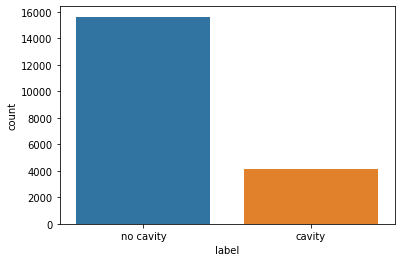

In [82]:
class_names=['no cavity','cavity']
# splitting train into cavity and not cavity dataframe

combined_IV.rename(columns={combined_IV.columns[-1]:'label'},inplace=True)
# df_train.head()
print("Dataset values\n",combined_IV.label.value_counts())

ax = sns.countplot(combined_IV.label)
ax.set_xticklabels(class_names)

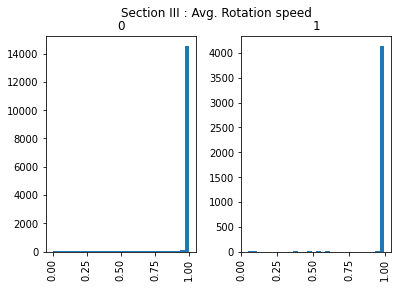

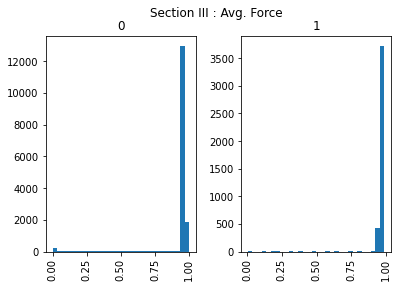

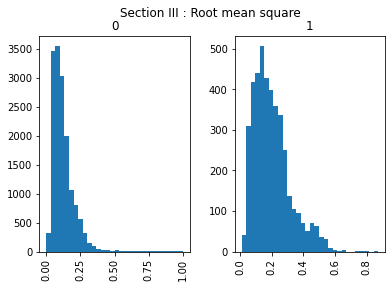

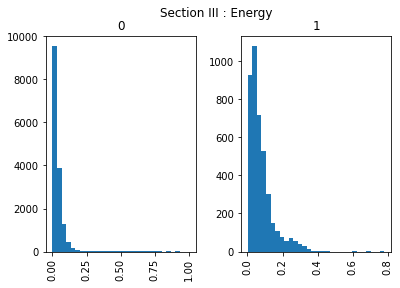

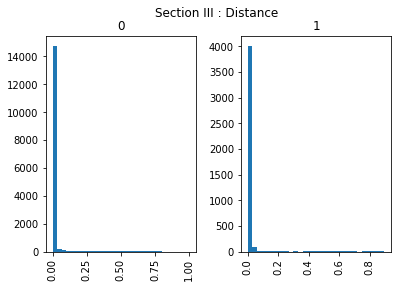

In [83]:
combined_IV['avg_rotation'].hist(by=combined_IV['label'],bins=30)
plt.suptitle('Section III : Avg. Rotation speed ',y=1)
plt.show()

combined_IV['avg_force'].hist(by=combined_IV['label'],bins=30)
plt.suptitle('Section III : Avg. Force ', y=1)
plt.show()

# ['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']
combined_IV['root_mean_square'].hist(by=combined_IV['label'],bins=30)
plt.suptitle('Section III : Root mean square ', y=1)
plt.show()

combined_IV['energy'].hist(by=combined_IV['label'],bins=30)
plt.suptitle('Section III : Energy ', y=1)
plt.show()

combined_IV['distance'].hist(by=combined_IV['label'],bins=30)
plt.suptitle('Section III : Distance ', y=1)
plt.show()

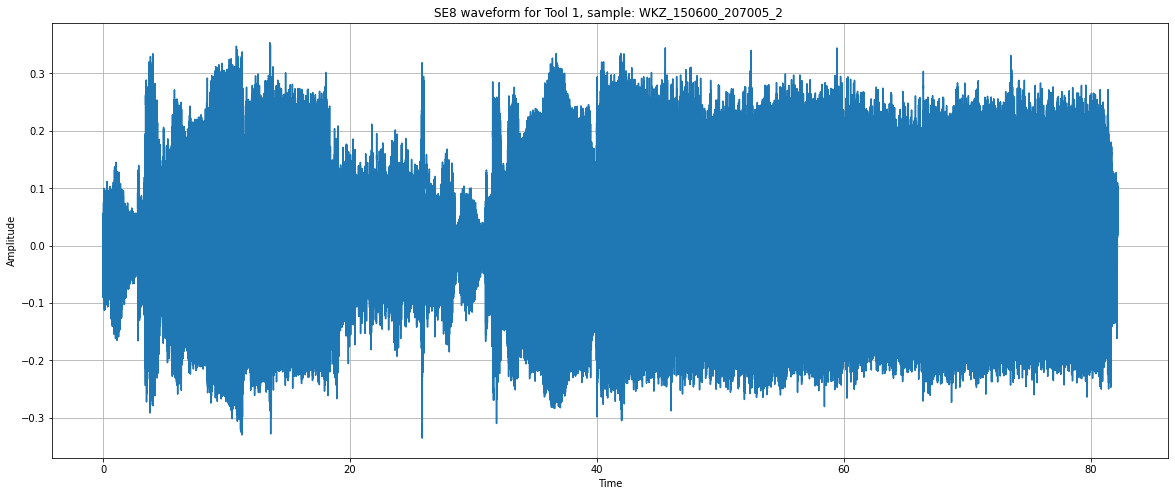

In [39]:
df_05_2=pd.read_csv('../Data/correct_rotation_force/Raw_data/WKZ_150600_207005/WKZ_150600_207005_2.csv')
se8_data=df_05_2['SE8']
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(df_05_2['Time'],df_05_2['SE8'],label='SE8 acoustic data')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('SE8 waveform for Tool 1, sample: WKZ_150600_207005_2 ')
ax.grid()
plt.show()

In [25]:
from reading_file import Load, Split
S=Split()
L=Load()

print(S.L_total_duration(16.67),S.M_total_duration(16.67))

all variables to be defined
Load constructor
13.557279999999999 40.25194999999999


In [35]:
L_end=26.078833
M_end=81.70042
L_duration=13.55727
M_duration=40.25194
L_start=L_end-L_duration
M_start=M_end-M_duration
print(L_start,L_end)
L_start_index=np.where(np.round(np.array(df_05_1['Time']),5)==np.round(L_start,5))
L_end_index=np.where(np.round(np.array(df_05_1['Time']),5)==np.round(L_end,4))
M_start_index=np.where(np.round(np.array(df_05_1['Time']),5)==np.round(M_start,5))
M_end_index=np.where(np.round(np.array(df_05_1['Time']),5)==np.round(M_end,5))
print(L_start_index,L_end_index)
print(M_start_index,M_end_index)


12.521562999999999 26.078833
(array([626078], dtype=int64),) (array([1303940], dtype=int64),)
(array([2072424], dtype=int64),) (array([4085021], dtype=int64),)


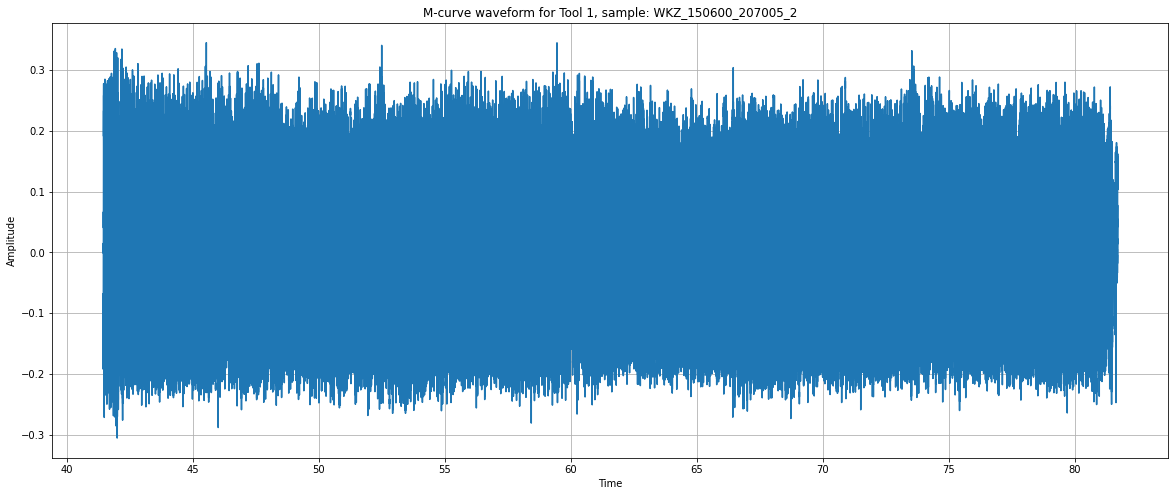

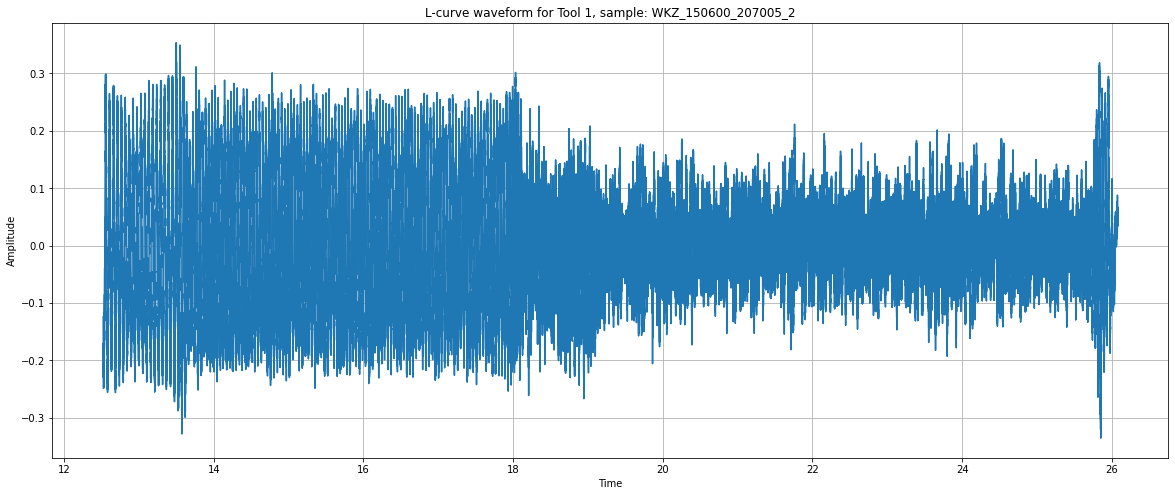

In [40]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(df_05_2['Time'][2072424:4085021],df_05_2['SE8'][2072424:4085021])
ax.set_title('M-curve waveform for Tool 1, sample: WKZ_150600_207005_2')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.grid()
plt.show()

fig,ax=plt.subplots(figsize=(20,8))
plt.plot(df_05_2['Time'][626078:1303940],df_05_2['SE8'][626078:1303940])
plt.title('L-curve waveform for Tool 1, sample: WKZ_150600_207005_2')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.grid()
plt.show()